In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from sklearn import preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [39]:
headers=['Tweet_ID','Entity','sentiment','tweet']
df = pd.read_csv('twitter_training.csv', names=headers)
df

,Tweet_ID,Entity,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [40]:
df = df.drop(columns=['Tweet_ID','Entity'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  74682 non-null  object
 1   tweet      73996 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [42]:
df['tweet'].isnull().sum()

686

In [43]:
df.dropna(axis=0, inplace=True)

In [44]:
empty = df[df['tweet']==' '].index
df.drop(empty , inplace=True)

In [45]:
df.duplicated().sum()

4059

In [46]:
df= df.drop_duplicates()

In [47]:
df.reset_index(drop=True, inplace=True)
df

,sentiment,tweet
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
69760,Positive,Just realized that the Windows partition of my...
69761,Positive,Just realized that my Mac window partition is ...
69762,Positive,Just realized the windows partition of my Mac ...
69763,Positive,Just realized between the windows partition of...


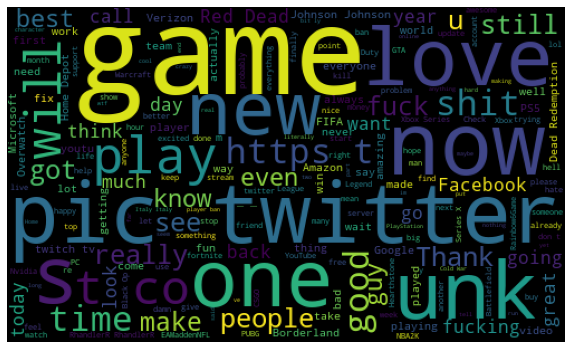

In [48]:
allwords = ' '.join(twts for twts in df['tweet'])
wordCloud = WordCloud(width=500, height=300, max_font_size=110).generate(allwords)

plt.figure(figsize=(10,8))
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

In [49]:
def show_word(sentiment):
  allwords = ' '.join(twts for twts in df[df['sentiment']==sentiment]['tweet'])
  wordCloud = WordCloud(width=500, height=300, max_font_size=110).generate(allwords)

  plt.figure(figsize=(10,8))
  plt.imshow(wordCloud)
  plt.axis('off')
  plt.show()

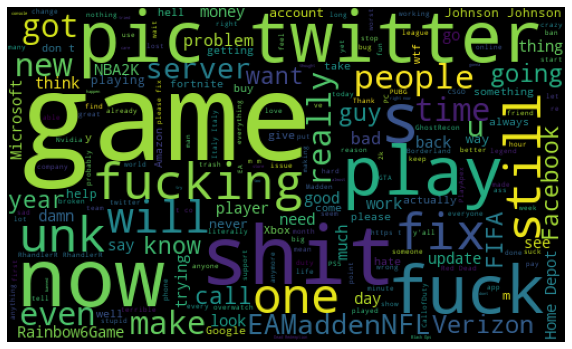

In [50]:
show_word('Negative')

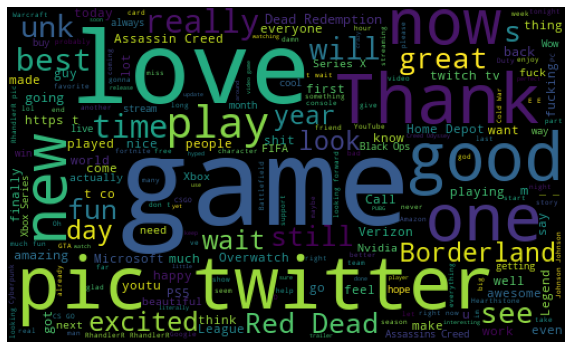

In [51]:
show_word('Positive')

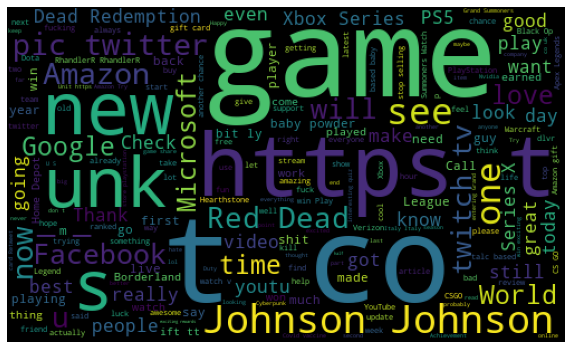

In [52]:
show_word('Neutral')

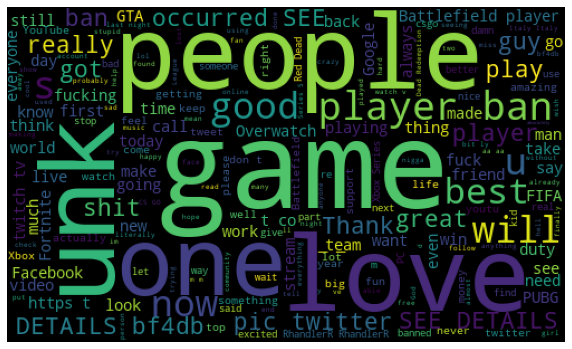

In [53]:
show_word('Irrelevant')

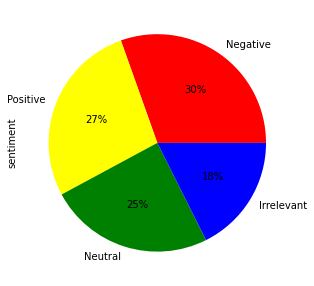

In [54]:
df.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(5,5),colors=["red", "yellow", "green",'blue'])
plt.show()

In [55]:
lb = preprocessing.LabelEncoder()
df['sentiment']=lb.fit_transform(df['sentiment'])

In [56]:
df.sentiment.value_counts()

1    21236
3    19137
2    17109
0    12283
Name: sentiment, dtype: int64

In [57]:
X = df['tweet'].copy()
y = df['sentiment'].copy()

In [58]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/salnuraqidah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer("english")

In [60]:
def data_cleaner(tweet):
  tweet = tweet.lower()
  tweet = tweet.replace(":("," sad")
  tweet = tweet.replace(":)"," happy")
  tweet = tweet.replace(":3"," cute")
  tweet = tweet.replace(":d"," happy")
  tweet = tweet.replace(":-)"," happy")
  tweet = tweet.replace(":="," happy")
  tweet = re.sub(r'http\S+',' ', tweet)
  tweet = re.sub(r'<.*?\>',' ', tweet)
  tweet = re.sub(r'\d+',' ', tweet)
  tweet = re.sub(r'@\w+',' ', tweet)
  tweet = re.sub(r'#\w+',' ', tweet)
  tweet = re.sub(r'[^\w\s]',' ', tweet)
  tweet = re.sub('[^A-Za-z0-9 ]+',' ', tweet)
  tweet = ' '.join([word for word in tweet.split() if not word in stop_words])
  tweet = ' '.join(stemmer.stem(word) for word in tweet.split())
  tweet = tweet.strip()
  return tweet
  

In [61]:
X

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
69760    Just realized that the Windows partition of my...
69761    Just realized that my Mac window partition is ...
69762    Just realized the windows partition of my Mac ...
69763    Just realized between the windows partition of...
69764    Just like the windows partition of my Mac is l...
Name: tweet, Length: 69765, dtype: object

In [62]:
X_cleaned = X.apply(data_cleaner)
X_cleaned

0                                 im get borderland murder
1                                         come border kill
2                                   im get borderland kill
3                                im come borderland murder
4                                 im get borderland murder
                               ...                        
69760    realiz window partit mac like year behind nvid...
69761    realiz mac window partit year behind nvidia dr...
69762    realiz window partit mac year behind nvidia dr...
69763    realiz window partit mac like year behind nvid...
69764    like window partit mac like year behind driver...
Name: tweet, Length: 69765, dtype: object

In [63]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X_cleaned)
X = tfidf_vectorizer.transform(X_cleaned)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)

In [65]:
text_classifier = RandomForestClassifier(n_estimators=500, random_state=0)
text_classifier.fit(X_train, y_train)

y_pred=text_classifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      3013
           1       0.90      0.96      0.93      5385
           2       0.95      0.91      0.93      4264
           3       0.91      0.93      0.92      4780

    accuracy                           0.92     17442
   macro avg       0.93      0.91      0.92     17442
weighted avg       0.92      0.92      0.92     17442



In [69]:
from sklearn.metrics import plot_confusion_matrix

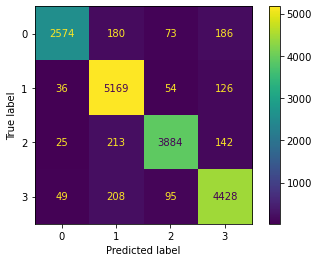

In [72]:
plot_confusion_matrix(text_classifier, X_test, y_test)  
plt.show()